In [172]:
import pandas as pd
import re
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# dataframe proses sebelum di cleansing

In [2]:
df = pd.read_csv("data.csv", encoding=("ISO-8859-1"),low_memory=False)
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(13169, 13)

In [3]:
df.info

<bound method DataFrame.info of                                                    Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2      41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3      USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4      USER USER Kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  USER jangan asal ngomong ndasmu. congor lu yg ...   1        1   
13165                       USER Kasur mana enak kunyuk'   0        1   
13166  USER Hati hati bisu :( .g\n\nlagi bosan huft \...   0        0   
13167  USER USER USER USER Bom yang real mudah terdet...   0        0   
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0          

In [4]:
df.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(13044, 13)

In [7]:
df.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000
mean,0.423030,0.383701,0.271389,0.151641,0.060488,0.043162,0.024686,0.023306,0.284115,0.256670,0.130175,0.036185
std,0.494059,0.486305,0.444693,0.358686,0.238397,0.203229,0.155171,0.150879,0.451009,0.436812,0.336509,0.186758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
frame=[df]
df_new=pd.concat(frame)

In [17]:
df_new= df_new.reset_index(drop=True)
df_new

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,hs_class
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,positive
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,negative
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,negative
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,negative
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13039,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,positive
13040,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,negative
13041,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,negative
13042,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,negative


In [9]:
def classify(hs):
    retval = ""
    if int(hs) == 1:
        retval = 'positive'
    else:
        retval = 'negative'
    return retval

In [10]:
df['hs_class'] = df['HS'].apply(classify)
df[['Tweet','hs_class']].sample(10)

,Tweet,hs_class
6124,"Pak USER mentri yg tak capai target, ganti. ak...",positive
12245,"USER Maen doank, kaga eue anjir :(('",negative
12071,5.210 Kendaraan Ditilang di Operasi Patuh Jaya...,negative
4257,USER USER Bangkai pasti bau',negative
7785,USER USER USER Taplak gunung',negative
6825,Ini setelah terjadi tarik-ulur terkait beda pa...,negative
2855,KPK RI Awasi Petahana Izin Cuti Ikut Pilkada t...,negative
10258,USER apaandah lu goblog',positive
5099,USER USER Si USER emang dungu tak bertepi. Sam...,positive
2336,RT USER: Calon partai GUREM yang kurang GAREM URL,positive


<AxesSubplot: xlabel='hs_class', ylabel='count'>

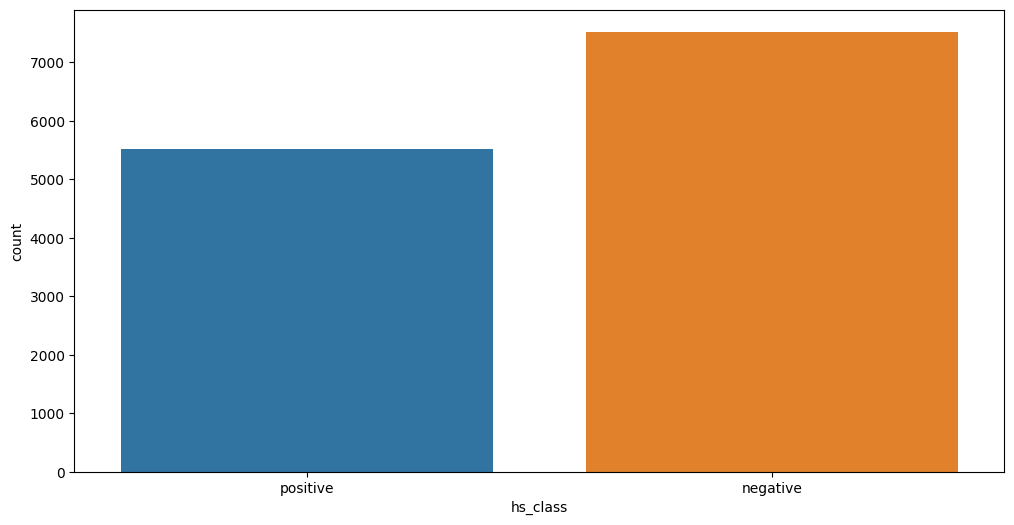

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='hs_class',data=df)

In [13]:
res1res1= res1.reset_index(drop=True)
res1

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
df_new.Tweet

0        - disaat semua cowok berusaha melacak perhatia...
1        RT USER: USER siapa yang telat ngasih tau elu?...
2        41. Kadang aku berfikir, kenapa aku tetap perc...
3        USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4        USER USER Kaum cebong kapir udah keliatan dong...
                               ...                        
13039    USER jangan asal ngomong ndasmu. congor lu yg ...
13040                         USER Kasur mana enak kunyuk'
13041    USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13042    USER USER USER USER Bom yang real mudah terdet...
13043    USER Mana situ ngasih(": itu cuma foto ya kuti...
Name: Tweet, Length: 13044, dtype: object

In [43]:
df_new['total_char'] = None
df_new

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,hs_class,total_char_new,total_word,total_char
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,positive,138,25,None
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,negative,120,21,None
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,negative,254,37,None
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,negative,75,14,None
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,positive,89,14,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13039,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,positive,61,10,None
13040,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,negative,28,5,None
13041,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,negative,62,9,None
13042,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,negative,135,22,None


In [83]:
for index,item in enumerate(df_new.Tweet):
  df_new['total_char'][index] = len(item)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18948\2358864078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['total_char'][index] = len(item)


In [84]:
df_new

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,hs_class,total_char_new,total_word,total_char,abusive,label_hs
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,positive,138,25,138,positive,positif
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,negative,120,21,120,positive,negatif
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,negative,254,37,254,negative,negatif
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,negative,75,14,75,negative,negatif
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,positive,89,14,89,positive,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13039,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,positive,61,10,61,positive,positif
13040,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,positive,28,5,28,positive,negatif
13041,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,positive,62,9,62,positive,negatif
13042,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,negative,135,22,135,positive,negatif


In [47]:
df_new.Tweet[0].split()

['-',
 'disaat',
 'semua',
 'cowok',
 'berusaha',
 'melacak',
 'perhatian',
 'gue.',
 'loe',
 'lantas',
 'remehkan',
 'perhatian',
 'yg',
 'gue',
 'kasih',
 'khusus',
 'ke',
 'elo.',
 'basic',
 'elo',
 'cowok',
 'bego',
 '!',
 '!',
 "!'"]

In [28]:
len(df_new.Tweet[0].split())

25

In [85]:
df_new['total_word'] = df_new.Tweet.apply(lambda words: len(words.split()))
df_new

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,hs_class,total_char_new,total_word,total_char,abusive,label_hs
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,positive,138,25,138,positive,positif
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,negative,120,21,120,positive,negatif
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,negative,254,37,254,negative,negatif
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,negative,75,14,75,negative,negatif
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,positive,89,14,89,positive,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13039,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,positive,61,10,61,positive,positif
13040,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,positive,28,5,28,positive,negatif
13041,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,positive,62,9,62,positive,negatif
13042,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,negative,135,22,135,positive,negatif


In [100]:
df_new['total_word'].groupby(df_new['label_hs']).mean()

label_hs
negatif    18.391443
positif    15.726894
Name: total_word, dtype: float64

In [96]:
df_new.groupbymean()

17.264259429622815

In [99]:
df_new['total_word'].mean()

17.264259429622815

In [93]:
df_new['total_char'].groupby(df_new['HS']).mean()

HS
0    122.887723
1    102.171983
Name: total_char, dtype: float64

In [41]:
df_new['total_word'].groupby(df_new['HS']).median()

HS
0    16.0
1    14.0
Name: total_word, dtype: float64

In [38]:
range_total_word = df_new.total_word.max() - df_new.total_word.min()
range_total_word

51

<AxesSubplot: >

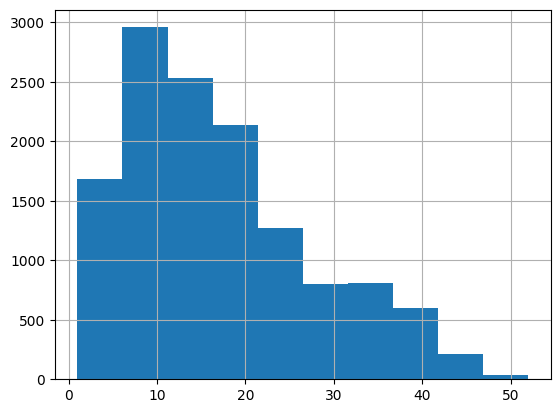

In [51]:
df_new.total_word.hist()

In [55]:
temp1 = df_new['total_word'].groupby(df_new['HS']).sum()
temp1 = temp1.to_list()
temp2 = df_new['total_word'].groupby(df_new['Abusive']).sum()
temp2 = temp2.to_list()

Text(0, 0.5, 'Jumlah kata')

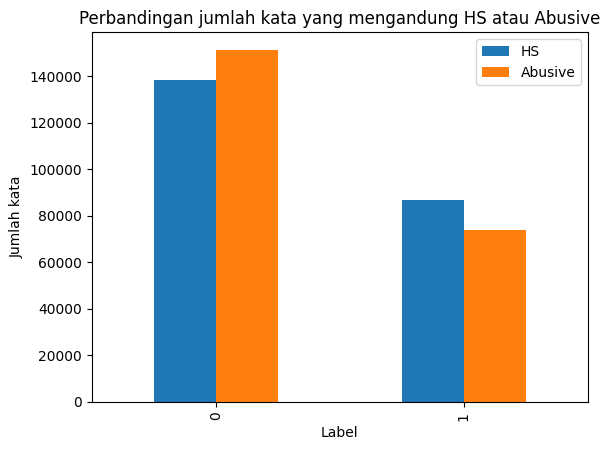

In [56]:
plotdata = pd.DataFrame({
    "HS":temp1,
    "Abusive":temp2
    }, 
    index=["0", "1"]
)
plotdata.plot(kind="bar")
plt.title("Perbandingan jumlah kata yang mengandung HS atau Abusive")
plt.xlabel("Label")
plt.ylabel("Jumlah kata")

In [57]:
plotdata

,HS,Abusive
0,138414,151349
1,86781,73846


In [58]:
def classify(hs):
    retval = ""
    if int(hs) == 1:
        retval = 'positive'
    else:
        retval = 'negative'
    return retval

In [62]:
df_new['hs_class'] = df['HS'].apply(classify)
df_new[['Tweet','hs_class']].sample(10)

,Tweet,hs_class
4867,RT USER: #IklanAhokJahat bagaimana klo kita ga...,negative
408,"islam di indonesia itu adalah islam nusantara,...",positive
7503,USER Wah ternyata bapak ini... berfikirnya ten...,negative
603,"Bu, di perpustakaan orangnya pada bisu ya bu? ...",negative
139,Aku bertanya tujuan pada hati\nLogikaku yg men...,negative
7558,BIADAB! Pekerja Asal Cina Membuang Bendera Ind...,positive
4668,USER USER Yg paling waras cuma kambing jantan ...,negative
9255,USER Prof. bagaimana menyikapi orang2 kristen ...,negative
5134,USER USER \nUSER USER USER \n\nAngkut gk nih??...,negative
2486,"20 tahun Reformasi, kenyataannya orang susah m...",negative


<AxesSubplot: xlabel='hs_class', ylabel='count'>

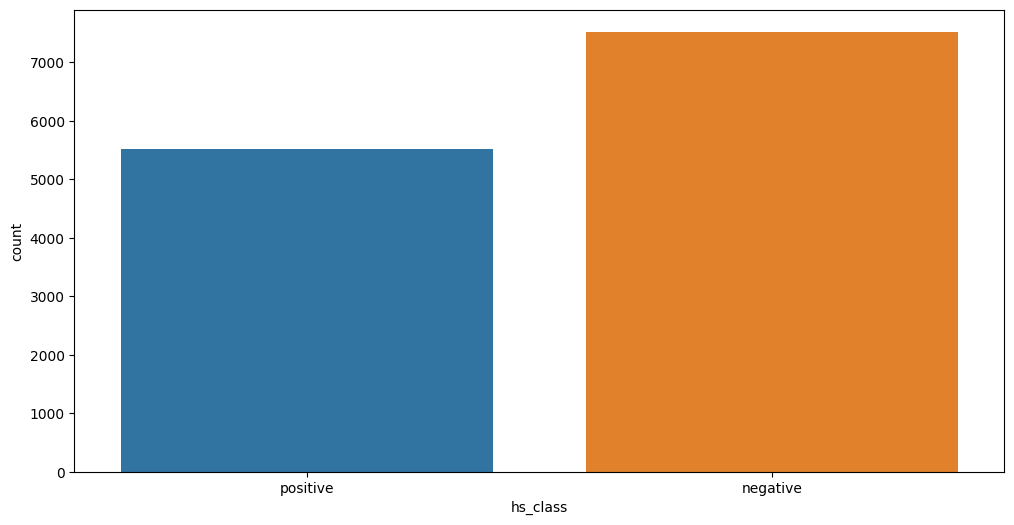

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x='hs_class',data=df_new)

In [65]:
df_new['abusive'] = df['Abusive'].apply(classify)
df_new[['Tweet','abusive']].sample(10)

,Tweet,abusive
9203,Ajarin pake ht..liat pk ht..gunain nalar sblm ...,positive
6712,USER Ini orang mengatasnamakan muslim tp picik...,negative
11835,USER Yg terbirit birit tunggang langgang linta...,negative
12495,"Islam yg dibawa Rasulullah saw telah sempurna,...",positive
12145,RT USER: Liburan emang paling enak ngentot. Dr...,negative
6049,"- Mau seleb td kelakuan kayak tai, dan ga disu...",negative
2475,Kalo kata anak rp jaman 2012 mah 'anjir jjkp. ...,negative
2116,Jangan ngaku cinta budaya negeri kalo nggak ik...,negative
9758,RT USER Dan Jokowi bukan Mega. Begini kalo mau...,negative
2860,USER USER USER Cuihhhhhhh najis',positive


<AxesSubplot: xlabel='abusive', ylabel='count'>

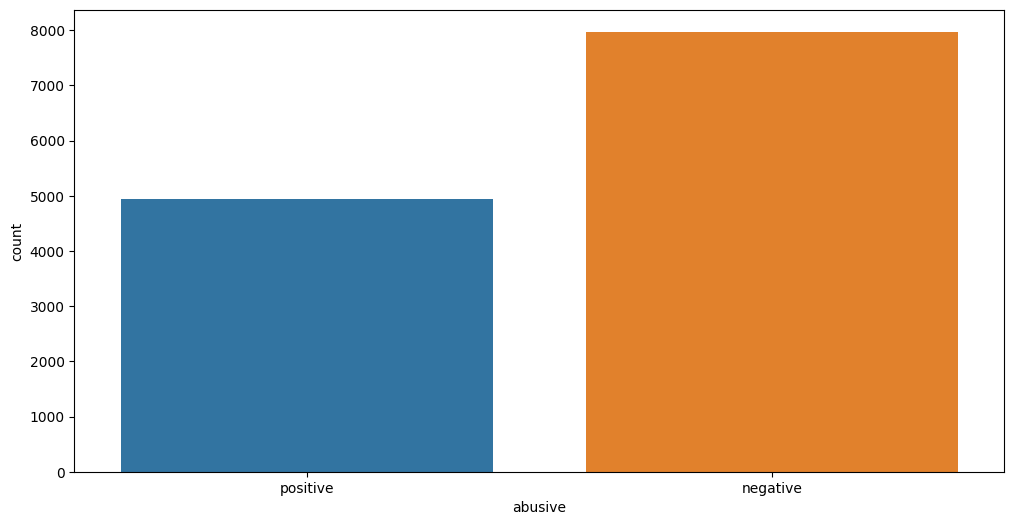

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(x='abusive',data=df_new)

In [68]:
temp = df_new.groupby('HS').count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')
temp

,HS,Tweet
0,0,7526
1,1,5518


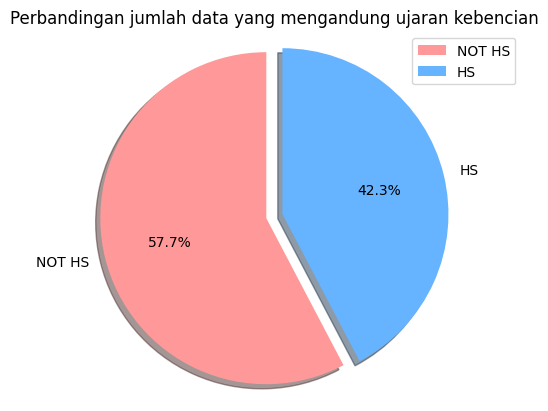

In [69]:
colors=['#ff9999','#66b3ff']
explode = (0, 0.1)

plt.pie(temp['Tweet'],labels=['NOT HS','HS'], colors=colors, startangle=90, autopct='%1.1f%%', shadow=True, explode = explode)
plt.axis('equal')
plt.title("Perbandingan jumlah data yang mengandung ujaran kebencian")
plt.legend()
plt.show()

In [76]:
def label(score):
  if score == 0:
    return 'negatif'
  else :
    return 'positif'

df_new['label_hs'] =df_new['HS'].apply(label)
df_new

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,hs_class,total_char_new,total_word,total_char,abusive,label_hs
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,positive,138,25,None,positive,positif
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,negative,120,21,None,positive,negatif
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,negative,254,37,None,negative,negatif
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,negative,75,14,None,negative,negatif
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,positive,89,14,None,positive,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13039,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,positive,61,10,None,positive,positif
13040,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,positive,28,5,None,positive,negatif
13041,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,positive,62,9,None,positive,negatif
13042,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,negative,135,22,None,positive,negatif


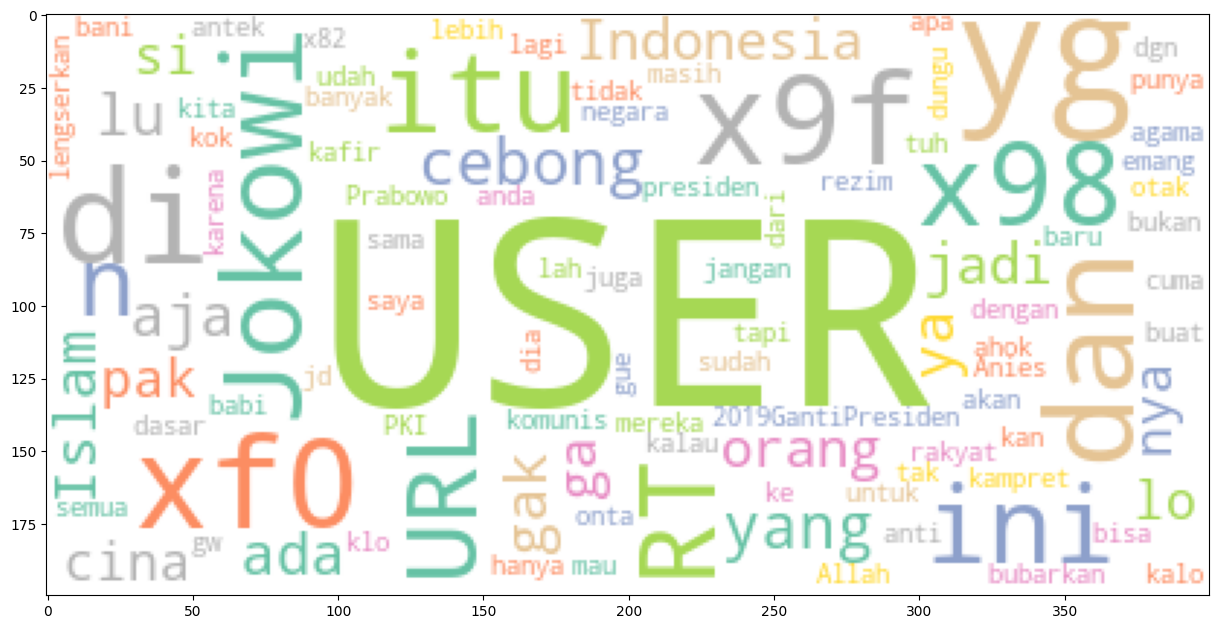

In [78]:
#Lihat persebaran kata di review text yang positif
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in df_new[df_new['label_hs'].str.contains('positif')]['Tweet'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=100,colormap='Set2', collocations=False, background_color="white").generate(text) 

plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

# setelah dataframe di  cleansing

In [112]:
new_df=pd.read_csv("output2.csv", names=['tweet','hs','abusive'])
new_df.head()

,tweet,hs,abusive
0,cowok berusaha melacak perhatian gue lantas r...,1,1
1,telat tau eluedan sarap gue bergaul cigax ji...,0,1
2,41 kadang berpikir percaya tuhan jatuh b...,0,0
3,akunnku tau matamu sipit,0,0
4,kaum cebong kafir dongoknya dungu haha,1,1


In [113]:
new_df[['tweet']] = new_df[['tweet']].applymap(lambda x: str(x))

In [126]:
def len_char(s): 
  total = len(s)
  return total
new_df['jumlah_char'] = new_df['tweet'].apply(len_char)

In [136]:
df=new_df.drop(columns=['jumlah_char_text', 'jumlah_word_text'])

In [138]:
df

,tweet,hs,abusive,jumlah_word,jumlah_char
0,cowok berusaha melacak perhatian gue lantas r...,1,1,14,100
1,telat tau eluedan sarap gue bergaul cigax ji...,0,1,10,63
2,41 kadang berpikir percaya tuhan jatuh b...,0,0,19,154
3,akunnku tau matamu sipit,0,0,4,24
4,kaum cebong kafir dongoknya dungu haha,1,1,6,42
...,...,...,...,...,...
13164,berbicara ndasmu congor sekata anjing,1,1,5,39
13165,kasur enak kunyuk,0,1,3,18
13166,hati hati bisu gnnlagi bosan duh,0,0,6,32
13167,bom real mudah terdeteksi bom terkubur dah...,0,0,10,77


In [142]:
df.drop_duplicates(inplace=True)

In [143]:
df

,tweet,hs,abusive,jumlah_word,jumlah_char
0,cowok berusaha melacak perhatian gue lantas r...,1,1,14,100
1,telat tau eluedan sarap gue bergaul cigax ji...,0,1,10,63
2,41 kadang berpikir percaya tuhan jatuh b...,0,0,19,154
3,akunnku tau matamu sipit,0,0,4,24
4,kaum cebong kafir dongoknya dungu haha,1,1,6,42
...,...,...,...,...,...
13164,berbicara ndasmu congor sekata anjing,1,1,5,39
13165,kasur enak kunyuk,0,1,3,18
13166,hati hati bisu gnnlagi bosan duh,0,0,6,32
13167,bom real mudah terdeteksi bom terkubur dah...,0,0,10,77


In [144]:
df.describe()

,hs,abusive,jumlah_word,jumlah_char
count,12748.000000,12748.000000,12748.000000,12748.000000
mean,0.423831,0.380687,10.414732,78.104722
std,0.494184,0.485575,6.576667,51.390189
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,5.000000,38.000000
50%,0.000000,0.000000,9.000000,68.000000
75%,1.000000,1.000000,14.000000,107.000000
max,1.000000,1.000000,54.000000,384.000000


In [173]:
df['temp_list'] = df['tweet'].apply(lambda x:str(x).split())

In [174]:
# mengandung HS
Positive_sent = df[df['hs']==1]
# tidak mengandung HS
Negative_sent = df[df['hs']==0]

In [175]:
Positive_sent.describe()

,hs,abusive,jumlah_word,jumlah_char
count,5403.0,5403.000000,5403.000000,5403.000000
mean,1.0,0.586341,9.713493,72.731816
std,0.0,0.492534,5.827053,44.922881
min,1.0,0.000000,1.000000,3.000000
25%,1.0,0.000000,5.000000,39.000000
50%,1.0,1.000000,9.000000,66.000000
75%,1.0,1.000000,13.000000,98.000000
max,1.0,1.000000,42.000000,298.000000


In [176]:
Negative_sent.describe()

,hs,abusive,jumlah_word,jumlah_char
count,7345.0,7345.000000,7345.000000,7345.000000
mean,0.0,0.229408,10.930565,82.057046
std,0.0,0.420481,7.033481,55.340980
min,0.0,0.000000,1.000000,1.000000
25%,0.0,0.000000,5.000000,37.000000
50%,0.0,0.000000,9.000000,70.000000
75%,0.0,0.000000,15.000000,117.000000
max,0.0,1.000000,54.000000,384.000000


In [177]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Kata','count']
temp_positive.style.background_gradient(cmap='Greens')

,Kata,count
0,indonesia,797
1,jokowi,678
2,uniform,490
3,resource,490
4,locator,490
5,cebong,479
6,orang,473
7,komunis,439
8,sih,421
9,islam,396


In [178]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Kata','count']
temp_negative.style.background_gradient(cmap='Reds')

,Kata,count
1,orang,762
2,indonesia,679
3,presiden,659
4,asing,456
5,agama,439
6,islam,397
7,daerah,388
8,sih,358
9,kristen,306
10,kepala,305


In [179]:
# check jumlah data yang mengandung ujaran kebencian
temp = new_df.groupby('hs').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')
temp

,hs,tweet
0,0,7608
1,1,5561


In [103]:
df_output['total_char'] = None
df_output

,tweet,hs,abusive,label_hs,total_char
0,cowok berusaha melacak perhatian gue lantas r...,1,1,positive,None
1,telat tau eluedan sarap gue bergaul cigax ji...,0,1,negative,None
2,41 kadang berpikir percaya tuhan jatuh b...,0,0,negative,None
3,akunnku tau matamu sipit,0,0,negative,None
4,kaum cebong kafir dongoknya dungu haha,1,1,positive,None
...,...,...,...,...,...
13164,berbicara ndasmu congor sekata anjing,1,1,positive,None
13165,kasur enak kunyuk,0,1,negative,None
13166,hati hati bisu gnnlagi bosan duh,0,0,negative,None
13167,bom real mudah terdeteksi bom terkubur dah...,0,0,negative,None


<AxesSubplot: >

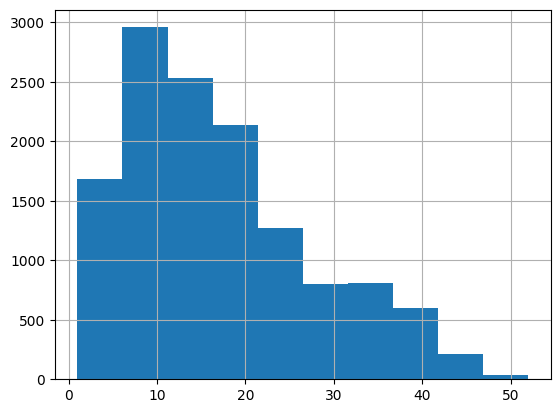

In [182]:
df_new.total_word.hist()

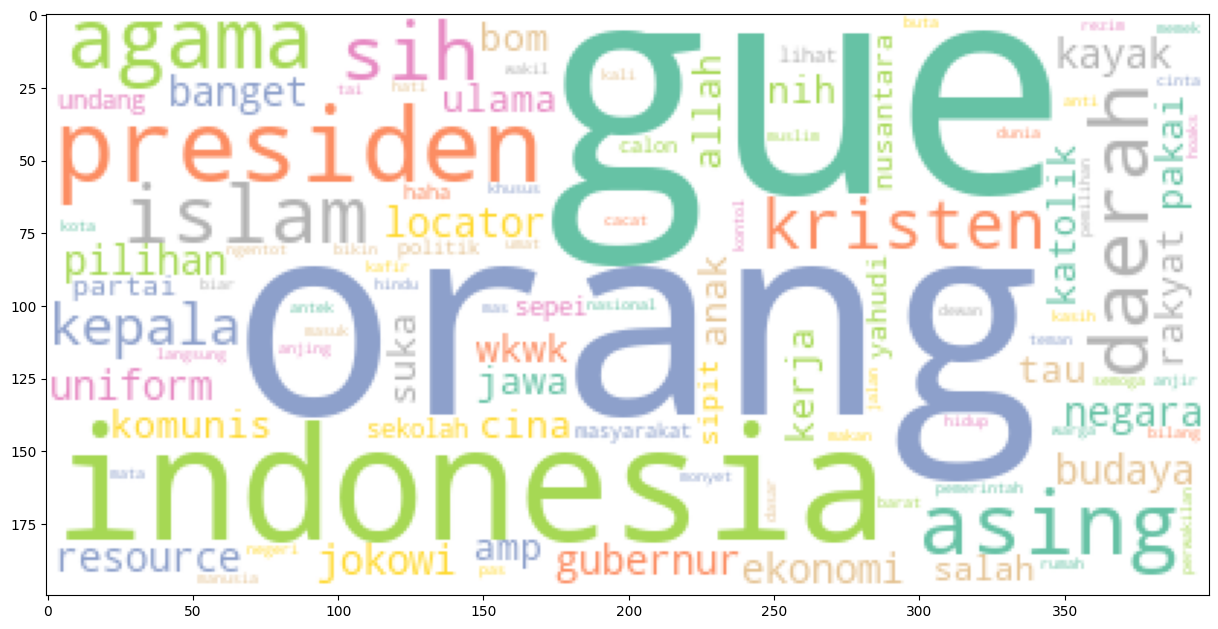

In [180]:
#Lihat persebaran kata di review text yang positif
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in df_output[df_output['label_hs'].str.contains('negative','positive')]['tweet'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=100,colormap='Set2', collocations=False, background_color="white").generate(text) 

plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

In [183]:
df.corr()

,hs,abusive,jumlah_word,jumlah_char
hs,1.000000,0.363261,-0.091453,-0.089674
abusive,0.363261,1.000000,-0.201161,-0.236902
jumlah_word,-0.091453,-0.201161,1.000000,0.975669
jumlah_char,-0.089674,-0.236902,0.975669,1.000000


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='jumlah_word', ylabel='jumlah_char'>

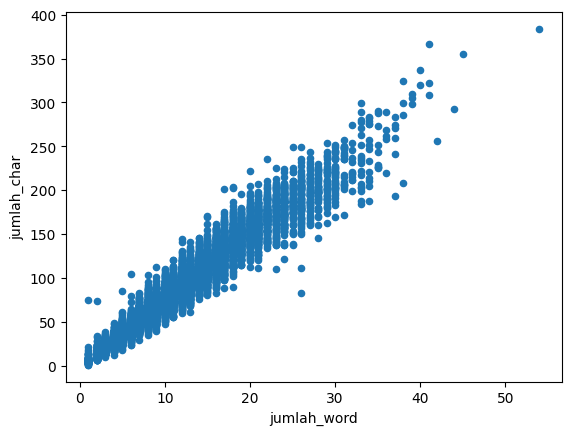

In [185]:
df.plot(x='jumlah_word',y='jumlah_char',kind = 'scatter')